# Lecture 12: Table Examples

 Before we start, please make sure you've loaded the lecture notebook so you can work along with me. 

We'll start by running the cell below to set up out notebook.

In [1]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import math
from scipy import stats
import numpy as np

Today we'll use use tables, histograms, grouping, pivots, and joins to do some more exploratory data analysis.  The data set we'll look at comes from the Capital Bikeshare program in Washington, DC.   

    
* 4500 bikes
* Over 600 stations
*  Washington, DC.; Arlington, VA; Alexandria, VA; Montgomery, MD; Prince George's County, MD; Fairfax County, VA; and the City of Falls Church, VA. 

<img src='bikeshare.png'> 



<img src="bikeshare2.png">

<font size=5> Goal: analysis of usage patterns  </font>

<font size=5> Data sets: [https://www.capitalbikeshare.com/system-data](https://www.capitalbikeshare.com/system-data)</font>

## Bicycle Data

In [2]:
# capitalbikeshare-tripdata.csv

# Load the data from DC_bike_data.csv

commute= Table.read_table('DC_bike_data.csv')
commute

ride_id,Start Station,End Station,start_lat,start_lng,end_lat,end_lng,seconds
13A48BD20CC3DD85,Connecticut Ave & Yuma St NW,Georgia Ave & Emerson St NW,38.9472,-77.0651,38.9497,-77.0273,1595
CA68C580B32EEE66,8th & D St NW,14th & D St SE,38.8948,-77.0231,38.8841,-76.986,1081
5A925307814D5C2B,Wilson Blvd. & N. Vermont St.,George Mason Dr & Wilson Blvd,38.8795,-77.1146,38.8789,-77.1207,173
B6B2DB54A2B233EE,Franklin St & S Washington St,Braddock Rd Metro,38.7981,-77.0487,38.8146,-77.0528,864
921A142D5C8A9759,St. Asaph & Montgomery St,Braddock Rd Metro,38.8142,-77.0438,38.8146,-77.0528,630
ACE4885E92D50094,5th & F St NW,4th St & G St SW,38.8972,-77.0193,38.8811,-77.0177,542
C4D62D59C61F0454,Columbia Rd & Belmont St NW,18th & R St NW,38.9207,-77.0437,38.9126,-77.0418,245
F84EF3FDCEFB5DE5,Montello Ave & Holbrook Terr NE,Lincoln Park / 13th & East Capitol St NE,38.9074,-76.9868,38.8905,-76.9884,1325
AECA5E64A3F6A077,18th & New Hampshire Ave NW,20th & E St NW,38.9113,-77.0418,38.8963,-77.045,532
833A52CA57389150,Eastern Market Metro / Pennsylvania Ave & 8th St SE,20th & E St NW,38.8843,-76.9947,38.8963,-77.045,1824


## Questions for today: 

<font size=3>

    
1. How long do people rent out a bike?
    
2. What's the most popular station?
    
3. What are the ride times between stations?
    
4. Where are the most popular areas for bike rental in the MD/DC/VA area?
    </font>

## How long do people rent out a bike?

In [5]:
# Find average ride time, in minutes

commute.column('seconds').mean()/60

21.241649358319936

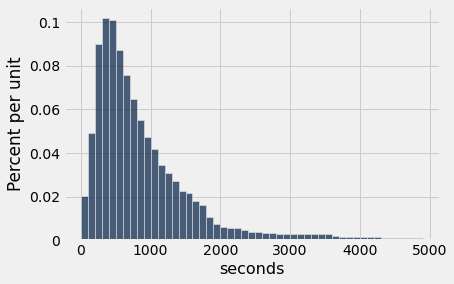

In [7]:
# Create histogram from 'commute' table;
# use bins of size 100 seconds 

commute.hist('seconds', bins=np.arange(0,5000, 100))

## What's the most popular station?

In [9]:
# Create table by grouping 'commute' by 'Start Station'
# column; name this table 'starts'

starts=commute.group('Start Station').sort('count', descending=True)
starts

Start Station,count
15th & P St NW,1125
New Hampshire Ave & T St NW,1079
14th & Irving St NW,944
1st & M St NE,844
8th & O St NW,831
14th & V St NW,822
11th & M St NW,794
Thomas Circle,770
5th & K St NW,765
20th St & Florida Ave NW,683


In [13]:
# Group 'commute' table by both 'Start Station' and 'End Station'
commute.group(['Start Station', 'End Station'])
.sort('count', descending=True)
                                               

Start Station,End Station,count
Jefferson Dr & 14th St SW,Jefferson Dr & 14th St SW,100
Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,98
1st & M St NE,1st & M St NE,86
Hains Point/Buckeye & Ohio Dr SW,Hains Point/Buckeye & Ohio Dr SW,86
Gravelly Point,Gravelly Point,80
Anacostia Park,Anacostia Park,77
4th St & Madison Dr NW,4th St & Madison Dr NW,68
Thomas Circle,Thomas Circle,63
New Hampshire Ave & T St NW,New Hampshire Ave & T St NW,61
14th & L St NW,14th & L St NW,59


In [14]:
# Creat pivot table from 'commute' using 'Start Station', 'End Station'

commute.pivot('Start Station', 'End Station')

End Station                   | 10th & E St NW | 10th & Florida Ave NW | 10th & G St NW | 10th & K St NW | 10th & Monroe St NE | 10th & U St NW | 10th St & Constitution Ave NW | 10th St & L'Enfant Plaza SW | 11th & C St SE | 11th & F St NW | 11th & Girard St NW | 11th & H St NE | 11th & Kenyon St NW | 11th & M St NW | 11th & O St NW | 11th & Park Rd NW | 11th & S St NW | 12th & Irving St NE | 12th & L St NW | 12th & Newton St NE | 12th & U St NW | 12th St & Pennsylvania Ave SE | 13th & D St NE | 13th & E St SE | 13th & H St NE | 13th & U St NW | 13th St & Eastern Ave | 13th St & New York Ave NW | 14th & Belmont St NW | 14th & D St NW / Ronald Reagan Building | 14th & D St SE | 14th & G St NW | 14th & Girard St NW | 14th & Harvard St NW | 14th & Irving St NW | 14th & L St NW | 14th & Luzon St NW | 14th & Newton St NW | 14th & Otis Pl NW | 14th & Q St NW | 14th & R St NW | 14th & Rhode Island Ave NW | 14th & Upshur St NW | 14th & V St NW | 14th St & Colorado Ave NW | 14th St & New York Ave NW | 14th St & Spring Rd NW | 14th St Heights / 14th & Crittenden St NW | 15th & East Capitol St NE | 15th & Euclid St  NW | 15th & F St NE | 15th & K St NW | 15th & L St NW | 15th & M St NW | 15th & P St NW | 15th & W St NW | 15th St & Constitution Ave NW | 15th St & Massachusetts Ave SE | 15th St & N Scott St | 15th St & Pennsylvania Ave NW | 16th & Harvard St NW | 16th & Irving St NW | 16th & Q St SE / Anacostia HS | 16th & R St NW | 17th & Corcoran St NW | 17th & G St NW | 17th & K St NW | 17th & K St NW / Farragut Square | 17th & Upshur St NW | 17th St & Independence Ave SW | 17th St & Massachusetts Ave NW | 18th & C St NW | 18th & L St NW | 18th & M St NW | 18th & Monroe St NE | 18th & New Hampshire Ave NW | 18th & R St NW | 18th St & Pennsylvania Ave NW | 18th St & Rhode Island Ave NE | 18th St & S Eads St | 18th St & Wyoming Ave NW | 19th & E Street NW | 19th & East Capitol St SE | 19th & G St NW | 19th & K St NW | 19th & Savannah St SE | 19th St & Constitution Ave NW | 19th St & Pennsylvania Ave NW | 1st & D St SE | 1st & H St NW | 1st & K St NE | 1st & K St SE | 1st & M St NE | 1st & M St SE | 1st & N St  SE | 1st & O St NW | 1st & Rhode Island Ave NW | 1st & S Capitol St SE / Oxon Run Trail | 1st & Washington Hospital Center NW | 1st St & Potomac Ave SE | 20th & Columbia Rd NW | 20th & E St NW | 20th & L St NW | 20th & O St NW / Dupont South | 20th St & Florida Ave NW | 20th St & Virginia Ave NW | 21st & I St NW | 21st St & Constitution Ave NW | 21st St & G st NW | 21st St & N Pierce St | 21st St & Pennsylvania Ave NW | 22nd & H St NW | 22nd & I St NW / Foggy Bottom | 22nd & P ST NW | 22nd St & Constitution Ave NW | 23rd & E St NW  | 23rd & M St NW | 23rd St S & Hayes St | 24th & N St NW | 24th & R St NE / National Arboretum | 25th St & Pennsylvania Ave NW | 28th St & S Meade St | 2nd & G St NE | 2nd & V St SW / James Creek Marina | 2nd St & Massachusetts Ave NE | 2nd St & Seaton Pl NE | 3000 Connecticut Ave NW / National Zoo | 31st & Water St NW | 31st St & S Woodrow St | 34th & Water St NW | 34th St & Wisconsin Ave NW | 36th & Calvert St NW / Glover Park | 37th & Ely Pl SE | 37th & O St NW / Georgetown University | 39th & Calvert St NW / Stoddert | 39th & Veazey St NW | 3rd & D St SE | 3rd & Elm St NW | 3rd & G St SE | 3rd & H St NE | 3rd & H St NW | 3rd & M St NE | 3rd & M st SE | 3rd & Tingey St SE | 3rd & Underwood St NW | 3rd St & Pennsylvania Ave SE | 3rd St & Riggs Rd NE | 47th & Elm St | 48th Pl & MacArthur Blvd NW | 4th & C St SW | 4th & D St NW / Judiciary Square | 4th & E St SW | 4th & East Capitol St NE | 4th & M St SE | 4th & M St SW | 4th & W St NE | 4th St & G St SW | 4th St & K St NW | 4th St & Madison Dr NW | 4th St & Mississippi Ave SE | 53rd & D St SE/C.W. Harris Elementary | 5th & F St NW | 5th & K St NW | 5th & Kennedy St NW | 5th St & Massachusetts Ave NW | 6035 Warehouse | 61st St & Banks Pl NE | 6th & H St NE | 6th & K St NE | 6th St & Indiana Ave NW | 7th & E St SW | 7th & F St NW / National Portrait Galler

## What are the ride times between stations?

In [15]:
# Creat pivot table from 'commute' using 'Start Station', 'End Station'
# Use np.average to aggregate 'seconds'

commute.pivot('Start Station',\
              'End Station', values= 'seconds', collect = np.average)

End Station                   | 10th & E St NW | 10th & Florida Ave NW | 10th & G St NW | 10th & K St NW | 10th & Monroe St NE | 10th & U St NW | 10th St & Constitution Ave NW | 10th St & L'Enfant Plaza SW | 11th & C St SE | 11th & F St NW | 11th & Girard St NW | 11th & H St NE | 11th & Kenyon St NW | 11th & M St NW | 11th & O St NW | 11th & Park Rd NW | 11th & S St NW | 12th & Irving St NE | 12th & L St NW | 12th & Newton St NE | 12th & U St NW | 12th St & Pennsylvania Ave SE | 13th & D St NE | 13th & E St SE | 13th & H St NE | 13th & U St NW | 13th St & Eastern Ave | 13th St & New York Ave NW | 14th & Belmont St NW | 14th & D St NW / Ronald Reagan Building | 14th & D St SE | 14th & G St NW | 14th & Girard St NW | 14th & Harvard St NW | 14th & Irving St NW | 14th & L St NW | 14th & Luzon St NW | 14th & Newton St NW | 14th & Otis Pl NW | 14th & Q St NW | 14th & R St NW | 14th & Rhode Island Ave NW | 14th & Upshur St NW | 14th & V St NW | 14th St & Colorado Ave NW | 14th St & New York Ave NW | 14th St & Spring Rd NW | 14th St Heights / 14th & Crittenden St NW | 15th & East Capitol St NE | 15th & Euclid St  NW | 15th & F St NE | 15th & K St NW | 15th & L St NW | 15th & M St NW | 15th & P St NW | 15th & W St NW | 15th St & Constitution Ave NW | 15th St & Massachusetts Ave SE | 15th St & N Scott St | 15th St & Pennsylvania Ave NW | 16th & Harvard St NW | 16th & Irving St NW | 16th & Q St SE / Anacostia HS | 16th & R St NW | 17th & Corcoran St NW | 17th & G St NW | 17th & K St NW | 17th & K St NW / Farragut Square | 17th & Upshur St NW | 17th St & Independence Ave SW | 17th St & Massachusetts Ave NW | 18th & C St NW | 18th & L St NW | 18th & M St NW | 18th & Monroe St NE | 18th & New Hampshire Ave NW | 18th & R St NW | 18th St & Pennsylvania Ave NW | 18th St & Rhode Island Ave NE | 18th St & S Eads St | 18th St & Wyoming Ave NW | 19th & E Street NW | 19th & East Capitol St SE | 19th & G St NW | 19th & K St NW | 19th & Savannah St SE | 19th St & Constitution Ave NW | 19th St & Pennsylvania Ave NW | 1st & D St SE | 1st & H St NW | 1st & K St NE | 1st & K St SE | 1st & M St NE | 1st & M St SE | 1st & N St  SE | 1st & O St NW | 1st & Rhode Island Ave NW | 1st & S Capitol St SE / Oxon Run Trail | 1st & Washington Hospital Center NW | 1st St & Potomac Ave SE | 20th & Columbia Rd NW | 20th & E St NW | 20th & L St NW | 20th & O St NW / Dupont South | 20th St & Florida Ave NW | 20th St & Virginia Ave NW | 21st & I St NW | 21st St & Constitution Ave NW | 21st St & G st NW | 21st St & N Pierce St | 21st St & Pennsylvania Ave NW | 22nd & H St NW | 22nd & I St NW / Foggy Bottom | 22nd & P ST NW | 22nd St & Constitution Ave NW | 23rd & E St NW  | 23rd & M St NW | 23rd St S & Hayes St | 24th & N St NW | 24th & R St NE / National Arboretum | 25th St & Pennsylvania Ave NW | 28th St & S Meade St | 2nd & G St NE | 2nd & V St SW / James Creek Marina | 2nd St & Massachusetts Ave NE | 2nd St & Seaton Pl NE | 3000 Connecticut Ave NW / National Zoo | 31st & Water St NW | 31st St & S Woodrow St | 34th & Water St NW | 34th St & Wisconsin Ave NW | 36th & Calvert St NW / Glover Park | 37th & Ely Pl SE | 37th & O St NW / Georgetown University | 39th & Calvert St NW / Stoddert | 39th & Veazey St NW | 3rd & D St SE | 3rd & Elm St NW | 3rd & G St SE | 3rd & H St NE | 3rd & H St NW | 3rd & M St NE | 3rd & M st SE | 3rd & Tingey St SE | 3rd & Underwood St NW | 3rd St & Pennsylvania Ave SE | 3rd St & Riggs Rd NE | 47th & Elm St | 48th Pl & MacArthur Blvd NW | 4th & C St SW | 4th & D St NW / Judiciary Square | 4th & E St SW | 4th & East Capitol St NE | 4th & M St SE | 4th & M St SW | 4th & W St NE | 4th St & G St SW | 4th St & K St NW | 4th St & Madison Dr NW | 4th St & Mississippi Ave SE | 53rd & D St SE/C.W. Harris Elementary | 5th & F St NW | 5th & K St NW | 5th & Kennedy St NW | 5th St & Massachusetts Ave NW | 6035 Warehouse | 61st St & Banks Pl NE | 6th & H St NE | 6th & K St NE | 6th St & Indiana Ave NW | 7th & E St SW | 7th & F St NW / National Portrait Galler

## Where are the most popular stations for bike rental in the MD/DC/VA area?

In [16]:
# Load table of stations and locations; save as 
# 'locations'

locations= Table.read_table('DCbike_station_locations.csv')
locations

Station,lat,long
Connecticut Ave & Yuma St NW,38.9472,-77.0651
8th & D St NW,38.8948,-77.0231
Wilson Blvd. & N. Vermont St.,38.8795,-77.1146
Franklin St & S Washington St,38.7981,-77.0487
St. Asaph & Montgomery St,38.8142,-77.0438
5th & F St NW,38.8972,-77.0193
Columbia Rd & Belmont St NW,38.9207,-77.0437
Montello Ave & Holbrook Terr NE,38.9074,-76.9868
18th & New Hampshire Ave NW,38.9113,-77.0418
Eastern Market Metro / Pennsylvania Ave & 8th St SE,38.8843,-76.9947


In [17]:
# Use 'Marker.map_table' to create map of all 
# bike station locations

Marker.map_table(locations.select('lat', 'long'))

In [18]:
# Our Starts table:

starts 

Start Station,count
15th & P St NW,1125
New Hampshire Ave & T St NW,1079
14th & Irving St NW,944
1st & M St NE,844
8th & O St NW,831
14th & V St NW,822
11th & M St NW,794
Thomas Circle,770
5th & K St NW,765
20th St & Florida Ave NW,683


In [19]:
# Use .join on 'location' and 'starts' to join these tables
# along stations

station_starts = locations.join('Station', starts, 'Start Station')
station_starts

Station,lat,long,count
10th & E St NW,38.8959,-77.0261,148
10th & Florida Ave NW,38.9204,-77.0257,451
10th & G St NW,38.8982,-77.0262,241
10th & K St NW,38.9024,-77.0262,342
10th & Monroe St NE,38.9325,-76.9929,72
10th & U St NW,38.9172,-77.0259,317
10th St & Constitution Ave NW,38.893,-77.026,105
10th St & L'Enfant Plaza SW,38.8843,-77.026,55
11th & C St SE,38.8859,-76.9915,261
11th & F St NW,38.8979,-77.027,192


In [20]:
# Use Circle.map_table to make a new map that visualizes
# useage of all stations 

starts_map_data = station_starts.select\
('lat', 'long', 'Station').with_columns(
    'color', 'blue',
    'area', station_starts.column('count') * .7
)
Circle.map_table(starts_map_data, color='green').show()

<font color='green'> </font>

<font color='green'> </font>